# Data cleaning: population

Importacion de la base de datos:


In [1]:
import pandas as pd

df = pd.read_csv("data/population.csv")

In [2]:
df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [3]:
df.shape

(70080, 8)

In [42]:
df.isna().sum()

Year                 0
District.Code        0
District.Name        0
Neighborhood.Code    0
Neighborhood.Name    0
Gender               0
Age                  0
Number               0
dtype: int64

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               70080 non-null  int64 
 1   District.Code      70080 non-null  int64 
 2   District.Name      70080 non-null  object
 3   Neighborhood.Code  70080 non-null  int64 
 4   Neighborhood.Name  70080 non-null  object
 5   Gender             70080 non-null  object
 6   Age                70080 non-null  object
 7   Number             70080 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [44]:
df.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [45]:
df["District.Name"].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [46]:
#df["Neighborhood.Name"].unique()
df["Year"].unique()

array([2017, 2016, 2015, 2014, 2013])

In [4]:
df["Age"].unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'], dtype=object)

In [47]:
df["Neighborhood.Name"].unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [48]:
df.columns

Index(['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number'],
      dtype='object')

In [49]:
df.duplicated(subset=['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number']).sum()

4277

In [50]:
df[df.duplicated(subset=['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number'], keep=False)].sort_values(by=['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number']).head(6)
#Nota, se tienen que eliminar algunos duplicados


,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
63802,2013,1,Ciutat Vella,1,el Raval,Female,10-14,167
64021,2013,1,Ciutat Vella,1,el Raval,Female,10-14,167
66503,2013,1,Ciutat Vella,1,el Raval,Female,45-49,299
66576,2013,1,Ciutat Vella,1,el Raval,Female,45-49,299
68620,2013,1,Ciutat Vella,1,el Raval,Female,75-79,156
68839,2013,1,Ciutat Vella,1,el Raval,Female,75-79,156


Eliminar los duplicados y actualiar la base de datos:

In [51]:
new_population = df.drop_duplicates(subset=['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number'])

In [52]:
print(df.shape)
print(new_population.shape)

(70080, 8)
(65803, 8)


In [53]:
new_population.to_csv("data/new_population.csv",index=False)

Creación del new_population.csv sin elemento duplicados para luego pasarlo a mongodb.

In [19]:
df = pd.read_csv("data/new_population.csv")
df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [63]:
a = df[df["Year"]==2017]
a["Number"].sum()

1564314

In [60]:
b= a.groupby("District.Name").sum("Number")
b

,Year,District.Code,Neighborhood.Code,Number
District.Name,,,,
Ciutat Vella,1466359,727,1816,98232
Eixample,2248955,2230,8358,258152
Gràcia,1847572,5496,27486,117227
Horta-Guinardó,3910963,13573,73480,161921
Les Corts,1127503,2236,11176,79888
Nou Barris,4667338,18512,115516,159214
Sant Andreu,2541420,11340,75681,143246
Sant Martí,3725399,18470,126519,227989
Sants-Montjuïc,2898429,4311,20918,174478


In [6]:
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
import seaborn as sns

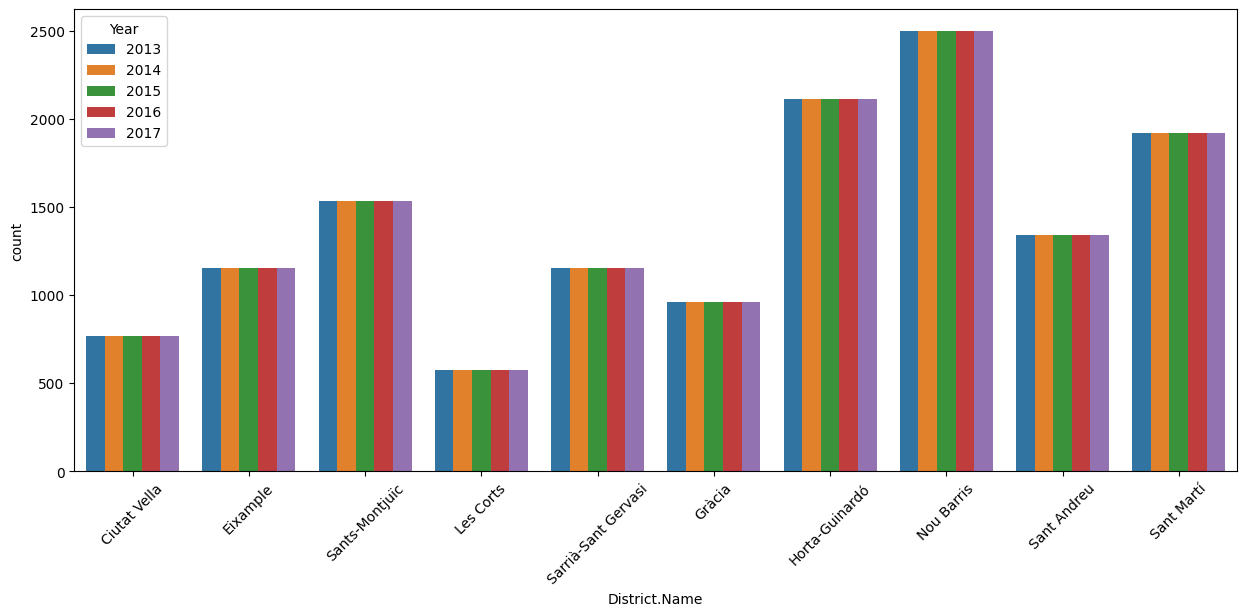

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='District.Name',hue="Year") # tambien se puede estratificar por genero hue="Gender"
plt.xticks(rotation=45)
plt.show()

Pruba para utilizar folium:


In [ ]:
a=['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí']

In [ ]:
district_coordinates =[
{ "Name":"Ciutat Vella","coordinates": [41.38022, 2.17319]},{"Name":"Sants-Montjuïc","coordinates": [41.37263, 2.1546]},
{"Name":"Eixample","coordinates": [41.38896, 2.16179]},{"Name":"Les Corts","coordinates": [41.38845,2.12171]},
{"Name":"Sarrià-Sant Gervasi","coordinates": [41.40237, 2.15641]},{"Name":"Gràcia","coordinates": [41.40237, 2.15641]},
{"Name":"Horta-Guinardó","coordinates": [41.41849, 2.1677]},{"Name":"Nou Barris","coordinates": [41.44163, 2.17727]},
{"Name":"Sant Andreu","coordinates": [41.43541, 2.18982]},{"Name":"Sant Martí","coordinates": [41.41814, 2.19933]}
]
